# Imports

In [72]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Loading Images

In [73]:
# Images folder path
imgs_path = 'imgs/'

In [74]:
def load_stereo_imgs(left_img_path, right_img_path):
    imgL = cv.imread(left_img_path, 0)
    imgR = cv.imread(right_img_path, 0)

    return imgL, imgR

In [75]:
img1L, img1R = load_stereo_imgs(imgs_path + 'l1.png', imgs_path + 'r1.png')
img2L, img2R = load_stereo_imgs(imgs_path + 'l2.png', imgs_path + 'r2.png')
img3L, img3R = load_stereo_imgs(imgs_path + 'l3.png', imgs_path + 'r3.png')

# Sample Run

(289, 382)


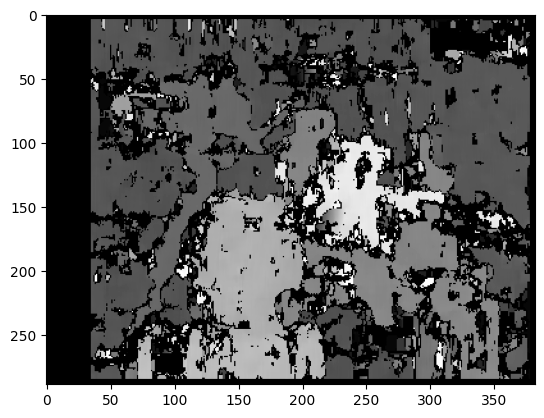

In [76]:
stereo = cv.StereoBM_create(numDisparities = 32, blockSize = 9)
disparity = stereo.compute(img1L, img1R)
plt.imshow(disparity, 'gray')
plt.show()

# 1.1.1 Block Matching

# 1.1.2 Dynamic programming

In [ ]:
def dynamic_prog_disparity(left_img, righ_img, sigma, c0):
    disparity = np.zeros(left_img.shape)
    D_matrices = [] # It will be used in the bonus part
    sigma_square = sigma ** 2
    # Loop on the image rows
    for r in range(left_img.shape[0]):
        D = np.zeros((len(left_img[r]), len(left_img[r])))
        # computing table step
        for i in range(1, D.shape[0]):
            for j in range(1, D.shape[1]):
                dij = (left_img[r, i] - righ_img[r, j]) ** 2 / sigma_square
                D[i, j] = min(D(i - 1, j - 1) + dij , min(D(i - 1, j) + c0, D(i, j - 1) + c0))

        # backtracking step
        i = D.shape[0] - 1
        j = D.shape[1] - 1
        while (i > 0 or j > 0):
            '''
            You can construct the disparity matrix and prepare the D matrix to be ploted directly in the bonus part by these steps:
            1 - choose the minimum value of D from (i - 1, j - 1), (i - 1, j), (i, j - 1)
            2- Selecting (i - 1, j) corresponds to skipping a pixel in Il, so the left disparity map of i is zero 
            (set the pixel (i, j - 1) with the value 255 to be directly plotted in the bonus part)
            3- Selecting (i, j - 1) corresponds to skipping a pixel in Ir, and the right disparity map of j is zero
            (set the pixel (i - 1, j) with the value 255 to be directly plotted in the bonus part)
            4- Selecting (i - 1, j - 1) matches pixels (i, j) and therefore both disparity maps at this position are set to the
            absolute difference between i and j
            (set the pixels (i - 1, j) and (i, j - 1) with the value 255 to be directly plotted in the bonus part)
            '''

        D_matrices.append(D)
    
    return disparity, D_matrices

In [ ]:
img1_disparity, img1_D_matrices = dynamic_prog_disparity(img1L, img1R, 2, 1)
plt.imshow(img1_disparity, 'gray')

In [ ]:
img2_disparity, img2_D_matrices = dynamic_prog_disparity(img2L, img2R, 2, 1)
plt.imshow(img2_disparity, 'gray')

In [ ]:
img3_disparity, img3_D_matrices = dynamic_prog_disparity(img3L, img3R, 2, 1)
plt.imshow(img3_disparity, 'gray')

# 1.2 Bonus

In [ ]:
# Plot one of the D_matrices for every test image (D_matrices should be pre-prepared)
# For every line pixel(i, j) the value of the pixle in D(i, j) will equal 0
# For every non-line pixel(i, j) the value of the pixel in D(i, j) will equal 255